<hr/>

# Data Mining 
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 5** 

- Regularization
- Principal Component Analysis
- Lagrange multipliers
- Explained variance 

<hr/>

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<h1><font color="darkblue">Continued from Last Lecture</font></h1>
<hr/>

### Linear Regression
- A linear combination of known $\phi_k(\cdot)$ **basis** functions 

>$\displaystyle f(t;\boldsymbol{\beta}) = \sum_{k=1}^K \beta_k\, \phi_k(t) $

> It's a [dot product](https://en.wikipedia.org/wiki/Dot_product#Definition)
>with $\boldsymbol{\beta}=(\beta_1,\dots,\beta_K)^T$

- Evaluated at all data points $x=(x_1,x_2,\dots,x_N)$

>$\displaystyle f(x;\boldsymbol{\beta}) = \boldsymbol{}X\boldsymbol\beta \ \ $ where $\ \ X_{ik} = \phi_k(x_i)$





### Method of Least Squares

- At the optimum

>$\displaystyle \boldsymbol{\hat\beta} = (X^T X)^{-1} X^T \boldsymbol{y} \; \; $ (c.f. **Lecture Note 04**)

- Hat matrix

>$\displaystyle {H} = X\,(X^T X)^{-1} X^T$
>
>$\boldsymbol{\hat{y}} = X\boldsymbol{\hat\beta} = X(X^T X)^{-1} X^T \boldsymbol{y} = H \boldsymbol{y}$

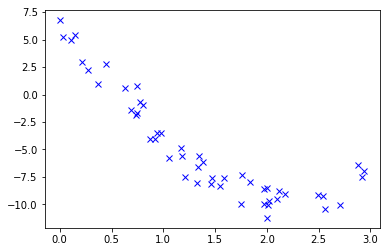

In [3]:
# Generate a dataset with errors
x = 3 * random.rand(50)          # uniform between 0 and 3
eps = 1 * random.randn(x.size)   # add normal noise
y = 10*cos(x+1) + eps;  

# Plot the data
plot(x, y, 'bx');                # 'b' for color(blue) and 'x' for marker

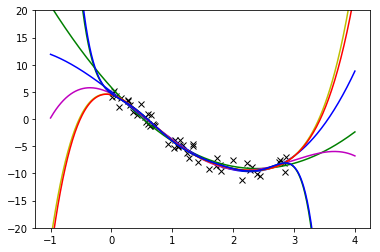

In [3]:
# Function to construct X matrix as [1, X, X^2, ..., X^n]
def poly(x,n):
    X = np.zeros((x.size,n+1));
    for i in range(X.shape[1]):
        X[:,i] = x**i
    return X

# Show data in black
plot(x,y,'kx'); 
ylim(-20, 20);               # control the range of y-axis to be (-20, 20)

xx = np.linspace(-1,4,500)   # grid on x
color = 'yrgbm' * 5          # color sequence


for n in range(2,9):
    X = poly(x,n)                 # design matrix for fitting
    bHat = linalg.pinv(X).dot(y)  # estimate beta
    yy = poly(xx,n).dot(bHat)     # prediction
    plot(xx,yy,'-',c=color[n]);   # plot to compare the truth and prediction

### Regularization

Penalize large coefficients in $\beta$

- **Ridge regression** uses $L_2$

> $\displaystyle \hat{\beta} = \arg\!\min_{\beta} \, \lvert y- X\beta \rvert^2_2\ + \lambda\,\lvert\beta\rvert^2_2$  

> or even with a constant matrix $\Gamma$

> $\displaystyle \hat{\beta} = \arg\!\min_{\beta} \, \lvert y- X\beta \rvert^2_2 + \lambda\,\lvert\Gamma\beta\rvert^2_2$  

- **Lasso regression** uses $L_1$

> $\displaystyle \hat{\beta} = \arg\!\min_{\beta}  \, \lvert y- X\beta \rvert^2_2 + \lambda\,\lvert\beta\rvert_1$ 

> $L_1$ yields sparse results

Different geometric meanings! 

- **Note**
> You may think of this as one application of bias-variance tradeoff into regression. We want to find a model that could have a good performence and in the meantime not too complex. After introducing some regularization into $ \hat{\beta} $, it will be composed of two part where first term would measure bias and second term would measure variance. And $ \lambda $ (strength) could be used to balance bias (accuracy) and variance (complexity). If $ \lambda $ is very small, then it will not care much about the complexity (second term) and may give us a relatively complex and accurated model. On the other hand, if $ \lambda $ is very large, then it will not care much about the accuracy (first term) and give us a relatively simple model with a bad performance.

- More about [Bias–variance tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)

### Linear Combinations

- Coefficients mix a given set of basis vectors, functions, images, shapes, ...

$$ f(x;\beta) = \sum_k \beta_k \phi_k(x) $$

> Fourier series

<img src=files/Periodic_identity_function.gif width=400> 
<!--<img src=https://upload.wikimedia.org/wikipedia/commons/e/e8/Periodic_identity_function.gif width=400> -->

> Discrete Cosine Transform (JPEG) 

<img src=files/DCT_basis_thumb.gif width=200>
<!--<img src=http://www.digitude.net/blog/wp-content/uploads/2010/07/DCT_basis_thumb.gif width=200>-->

> Spherical Harmonics

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/Spherical_Harmonics.png/300px-Spherical_Harmonics.png>
<!--<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/Spherical_Harmonics.png/300px-Spherical_Harmonics.png>-->

- What is a good basis like?



<h1><font color="darkblue">Principal Component Analysis</font></h1>
<hr/>

### Statistical Learning

 |   Output Type  | Supervised     |         Unsupervised     |
 |:---------------|:--------------:|:------------------------:|
 | **Discrete**   | Classification | Clustering               |   
 | **Continuous** | Regression     | Dimensionality Reduction |



<img src=files/800px-GaussianScatterPCA.png width=300 align=center>

### Directions of Maximum Variance

- Let $X\in\mathbb{R}^N$ be a continuous random variable with $\mathbb{E}\left[X\right]=0$ mean and covariance matrix $C$. What is the direction of maximum variance?

> For any vector $a\in\mathbb{R}^N$, we have
>
> $\displaystyle \mathbb{Var}[a^T X] = \mathbb{E} \left[(a^T X - \mathbb{E}[a^T X])(a^T X - \mathbb{E}[a^T X])^T \right] = \mathbb{E} \left[(a^T X - 0)(a^T X - 0)^T \right] = \mathbb{E}\left[(a^T X)(X^T a)\right] = \mathbb{E}\left[a^T(XX^T)\,a\right]$

> Note that
>
> $\displaystyle C = \mathbb{E} \left[(X-\mathbb{E}\left[X\right])(X-\mathbb{E}\left[X\right])^T \right] = \mathbb{E} \left[(X-0)(X-0)^T \right] = \mathbb{E}\!\left[XX^T\right] $

> Then we have
>
> $\displaystyle \mathbb{Var}[a^T X] = a^T\,\mathbb{E}\!\left[XX^T\right]\,a = a^T C\,a$

> We have to maximize this such that $a^2\!=\!1$

### Constrained Optimization

- **Lagrange multiplier**: extra term with new parameter $\lambda$

> $\displaystyle  \hat{a} = \arg\max_{a\in{}\mathbb{R}^N} \left[a^T C\,a - \lambda\,(a^2\!-\!1)\right]$

- Partial derivatives vanish at optimum

> $\displaystyle \frac{\partial}{\partial\lambda} \rightarrow\ \  \hat{a}^2\!-\!1 = 0\ \ $  (duh!)

> $\displaystyle \frac{\partial}{\partial a_k} \rightarrow\ \  $?

- More about [Lagrange multiplier](https://en.wikipedia.org/wiki/Lagrange_multiplier)

### With Indices


> $\displaystyle \max_{a\in{}\mathbb{R}^N}  \left[ \sum_{i,j} a_i C_{ij} a_j - \lambda\,\left(\sum_i a_i^2 - 1\right) \right]$

- Partial derivatives $\partial \big/ \partial a_k$ vanish at optimum

> $\displaystyle \sum_{i,j} \frac{\partial a_i}{\partial a_k} C_{ij} a_j + \sum_{i,j} a_i C_{ij} \frac{\partial a_j}{\partial a_k} - 2\lambda\,\left(\sum_i a_i \frac{\partial a_i}{\partial a_k}\right) $ 
>
> $=\displaystyle \sum_{i,j} \delta_{ik} C_{ij} a_j + \sum_{i,j} a_i C_{ij} \delta_{jk} - 2\lambda\,\left(\sum_i a_i \delta_{ik}\right) $ 
>
> $=\displaystyle \sum_{j} C_{kj} a_j + \sum_{i} a_i C_{ik}  - 2\lambda\,a_k $
>
> $=0$


### With Vectors and Matrices

- Write the equation above with indices as

> $\displaystyle  C \hat{a} + C^T\hat{a} - 2\lambda \hat{a} = 0$

> Note that $C$ is symmetric, i.e. $ C = C^T $, then we have

> $\displaystyle  C\,\hat{a} = \lambda\,\hat{a} $

- Eigenproblem !! ([quick review](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix#Fundamental_theory_of_matrix_eigenvectors_and_eigenvalues))

### Result

- The value of maximum variance is

> $\displaystyle  \hat{a}^TC\,\hat{a} = \hat{a}^T \lambda\,\hat{a} = \lambda\, \hat{a}^T\hat{a} = \lambda$

> the largest eigenvalue $\lambda_1$

- The direction of maximum variance is the corresponding eigenvector $a_1$

> $\displaystyle  Ca_1 = \lambda_1 a_1 $

- This is the **1st Principal Component** 




### 2nd Principal Component

- Direction of largest variance uncorrelated to 1st PC

> $\displaystyle  \hat{a} = \arg\max_{a\in{}\mathbb{R}^N} \left[a^T C\,a - \lambda\,(a^2\!-\!1) - \lambda'(a^T C\,a_1) \right]$

- Partial derivatives vanish at optimum

> $\displaystyle 2C\,\hat{a} - 2\lambda\,\hat{a}-\lambda'Ca_1 = 0$

### Result

- Multiply the equation above by $a_1^T$

> $\displaystyle 2a_1^TC\hat{a} - 2a_1^T\lambda{}\hat{a}-a_1^T\lambda'Ca_1 = 0$

> $\displaystyle 0 - 0 - \lambda'\lambda_1 = 0 \ \ \Rightarrow\ \  \lambda'=0$

- Still just an eigenproblem 

> $\displaystyle  C\,\hat{a} = \lambda\,\hat{a} $

- Solution $\lambda_2$ and $a_2$

### Quick Review of Matrix Decomposition

In [1]:
from scipy import linalg

- **Eigendecomposition** ([more](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix))

> Only for [diagonalizable matrices](https://en.wikipedia.org/wiki/Diagonalizable_matrix)
>
> A square matrix $A$ is called diagonalizable if there exists an invertible matrix $P$ such that $P^{-1}AP$ is a diagonal matrix

In [16]:
# Example
A = np.array([[1, 2], [3, 4]])
print('Original Matrix: \n', A, '\n')

# Eigendecomposition
eigenvalues, eigenvector = linalg.eig(A)
print('Eigenvalues: \n', eigenvalues, '\n')
print('Eigenvector: \n', eigenvector)

Original Matrix: 
 [[1 2]
 [3 4]] 

Eigenvalues: 
 [-0.37228132+0.j  5.37228132+0.j] 

Eigenvector: 
 [[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


- **Singular-value decomposition** ([more](https://en.wikipedia.org/wiki/Singular_value_decomposition))

> The generalization of the eigendecomposition 
>
> For example, a symmetric $ n \times n $ matrix with positive eigenvalues to any $ n \times m $ matrix
>
> $ X_{n \times m} = U W V^ \top \; $ where
- $ U_{n \times n} $, $ \; U^\top U=I $
- $ W_{n \times m} $, $\;$ diagonal
- $ V_{m \times m} $, $ \; V^\top V=I $

> More generalized [statement](https://en.wikipedia.org/wiki/Singular_value_decomposition#Statement_of_the_theorem)

In [17]:
# Example
n, m = 5, 3
A = np.random.randn(n, m)
print('Original Matrix: \n', A, '\n')

# SVD
U, s, Vh = linalg.svd(A)
print('Singular values: \n', s, '\n')
print('Left-singular vectors: \n', U, '\n')
print('Right-singular vectors: \n', Vh)

Original Matrix: 
 [[ 0.78201235  0.40873402  1.79678023]
 [-0.03283456  0.67667488  0.70474974]
 [ 0.58344619 -2.49675905  0.73040356]
 [-0.70446348 -0.44383086  0.54694535]
 [-0.5574503  -0.43436972  0.96630686]] 

Singular values: 
 [ 2.83884541  2.21225441  1.24211015] 

Left-singular vectors: 
 [[ 0.22130179  0.83688766 -0.34592791  0.32134998  0.16647111]
 [-0.08831846  0.42284737  0.10716452 -0.56521191 -0.69458708]
 [ 0.91437488 -0.24459206 -0.22325462 -0.1345451  -0.19012702]
 [ 0.19036147  0.06475187  0.66381135  0.6118337  -0.38024166]
 [ 0.26628265  0.23832973  0.61511098 -0.4299149   0.55597136]] 

Right-singular vectors: 
 [[ 0.15038055 -0.86388519  0.48071621]
 [ 0.14437484  0.50022276  0.85377579]
 [-0.97802945 -0.05898794  0.19994705]]


- **A little bit more about [`scipy.linalg.eig`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html) and [`scipy.linalg.svd`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html)**

### PCA 

- Spectral decomposition or eigenvalue decomposition or eigendecomposition

> Let $\lambda_1\geq\lambda_2\geq\dots\geq\lambda_N\geq{}0$ be the eigenvalues of $C$ and ${e}_1,\dots,{e}_N$ the corresponding eigenvectors

> $\displaystyle  C = \sum_{k=1}^N\ \lambda_k\left({e}_k\,{e}_k^T\right) $

> Consider $\displaystyle C\,e_l = \sum_k \lambda_k\,e_k\left(e_k^T e_l\right) = \lambda_l\,e_l$ for any $l$

- Matrix form

> With diagonal $\Lambda$ matrix of the eigenvalues and an $E$ matrix of $[{e}_1, \dots, {e}_N]$

> $\displaystyle  C = E\ \Lambda\ E^T$


- The eigenvectors of largest eigenvalues capture the most variance

> If keeping only $K<N$ eigenvectors, the best approximation is taking the first $K$ PCs

> $\displaystyle  C \approx \sum_{k=1}^K\ \lambda_k\left({e}_k\,{e}_k^T\right) =  E_K\Lambda_KE_K^T$





### New Coordiante System

- The $E$ matrix of eigenvectors is a rotation, $E\,E^T = I$

> $\displaystyle  Z = E^T\, X $


- A truncated set of eigenvectors $E_K$ defines a projection

> $\displaystyle  Z_K = E_K^T\, X $

> and

> $\displaystyle  X_K = E_K Z_K = E_K E_K^T\, X = P_K\,X $




### Detour: Projections

- If the square of a matrix is equal to itself

> $\displaystyle  P^2 = P $

- For example, projecting on the ${e}$ [unit vector](https://en.wikipedia.org/wiki/Unit_vector)

<img src=files/Y7Gx8.png align=right width=250>

> Scalar times vector

> $\displaystyle  r' = {e}\left({e}^T r\right) = {e}\,\beta_r$

> Or  projection of vector $r$

> $\displaystyle  r' = \left({e}\,{e}^T\right)r = P\,r$




### Again

- The eigenvectors of largest eigenvalues capture the most variance

> $\displaystyle  C \approx C_K = \sum_{k=1}^K\ \lambda_k\left({e}_k\,{e}_k^T\right) = \sum_{k=1}^K\ \lambda_k\,P_k$

- And the remaining eigenvectors span the subspace with the least variance

> $\displaystyle  C - C_K = %\sum_{l=K+1}^N\ \lambda_l\left(\hat{e}_l\,\hat{e}_l^T\right) =
\sum_{l=K+1}^N\ \lambda_l\,P_l$


### Samples

- Set of $N$-vectors arranged in matrix $X=\left[x_1, x_2, \dots, x_n \right]$ with average of 0 <br>
<font color="red">*This is NOT the random variable we talked about previously but the data matrix!*</font>

> Sample covariance matrix is
>
>$\displaystyle C = \frac{1}{n\!-\!1}\ X X^T = \frac{1}{n\!-\!1}\  \sum_i x_i x_i^T$

- Singular Value Decomposition (SVD)

>$\displaystyle X = U W V^T$
>
> where $U^TU=I$, $W$ is diagonal (thus $ W = W^T $), and $V^TV=I$

- Hence

>$\displaystyle C = \frac{1}{n\!-\!1}\ X X^T = \frac{1}{n\!-\!1}\  UWV^T\ (UWV^T)^T = \frac{1}{n\!-\!1}\  UWV^T\ VWU^T = \frac{1}{n\!-\!1}\ U W^2 U^T$
>
> So, if $C=E\Lambda E^T$ then we have
>
> $\displaystyle E\Lambda E^T = \frac{1}{n\!-\!1}\ U W^2 U^T $
>
> $E = U$ and $\displaystyle \Lambda = \frac{1}{n\!-\!1}\  W^2$



### Random Sample from Bivariate Normal 

- See previous lecture

In [ ]:
from scipy.stats import norm

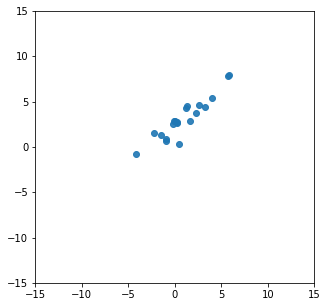

In [4]:
# Generate multiple 2-D (column) vectors
S = norm.rvs(0,1,(2,20))

# Scale axis 0
S[0,:] *= 4  

# Rotate by 45 degrees
f = +pi/4    
R = array([[cos(f), -sin(f)],
           [sin(f),  cos(f)]]) 
X = R.dot(S)

# Shift
X += np.array([[1],[3]]) 

# Plot the points
figure(figsize=(5,5)); 
xlim(-15,15); 
ylim(-15,15);
plot(X[0,:],X[1,:],'o',alpha=0.9);

In [5]:
# Subtract sample mean (centering)
avg = mean(X, axis=1).reshape(X[:,1].size,1)
X -= avg

# Sample covariance matrix
C = X.dot(X.T) / (X[0,:].size-1) 
print ("Average\n", avg)
print ("Covariance\n", C)

Average
 [[0.93672793]
 [3.15384841]]
Covariance
 [[6.32146385 5.33703843]
 [5.33703843 5.22827649]]


In [6]:
# Eigendecomposition of covariance matrix
L, E = np.linalg.eig(C)
E, L

(array([[ 0.74225408, -0.67011855],
        [ 0.67011855,  0.74225408]]), array([11.13982533,  0.40991501]))

In [7]:
# SVD of covariance matrix
E, L, E_same = np.linalg.svd(C)
E, L

(array([[-0.74225408, -0.67011855],
        [-0.67011855,  0.74225408]]), array([11.13982533,  0.40991501]))

In [8]:
# Check EE^T = I
E.dot(E.T)

array([[1.00000000e+00, 1.44246972e-16],
       [1.44246972e-16, 1.00000000e+00]])

In [9]:
# Check E^T and E^(-1) are very close
np.allclose( E.T, np.linalg.inv(E) )

True

In [10]:
# SVD of original data matrix
U, W, V = np.linalg.svd(X)
U, W**2 / (X[0,:].size-1)

(array([[-0.74225408, -0.67011855],
        [-0.67011855,  0.74225408]]), array([11.13982533,  0.40991501]))

In [11]:
# Alternatively
U, W**2 / (X.shape[1]-1)

(array([[-0.74225408, -0.67011855],
        [-0.67011855,  0.74225408]]), array([11.13982533,  0.40991501]))

In [12]:
# Check UU^T = I and VV^T = I
[ np.allclose( U.dot(U.T), np.eye(U.shape[0]) ), 
  np.allclose( V.dot(V.T), np.eye(V.shape[0]) )  ]

[True, True]

In [ ]:
from sklearn import decomposition

In [13]:
# Another way to do PCA
pca = decomposition.PCA(n_components=X.shape[0])
pca.fit(X.T) # different convention: row vs col !!!

# E and Lambda
pca.components_.T, pca.explained_variance_

(array([[ 0.74225408,  0.67011855],
        [ 0.67011855, -0.74225408]]), array([11.13982533,  0.40991501]))